In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("/Users/yasaswi/Documents/marlabs/training/datasets/income.csv")

income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [43]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    return X_train, X_test, y_train, y_test

In [44]:
X_train, X_test, y_train, y_test = income_model_prep(income)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)

print(f"Accuracy: {lr.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

Accuracy: 0.8481863664790494
F1: 0.6508450197770587


## Assignment 1: Sampling Methods

The following steps can be done one by one or in a single cell.

1. Undersample the data to a 2:1 ratio of 0s to 1s and fit a logistic regression - generate a confusion matrix and calculate common evaluation metrics (Accuracy, Precision Recall, F1). 

2. Oversample the data using random oversampling.Create 4x the the current number of 1s. and fit a logistic regression - generate a confusion matrix and calculate common evaluation metrics. 

3. Use SMOTE to oversample the data. Create 4x the the current number of 1s. Fit a logistic regression and generate a confusion matrix, as well as calculate common evaluation metrics. 

4. Which model sampling approach best for this data? Pick the one that gave the best performance at the default threshold, then tune the threshold and report optimized F1 score.

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Undersampling
RUS = RandomUnderSampler(sampling_strategy=0.5, random_state=101)
X_train_rus, y_train_rus = RUS.fit_resample(X_train, y_train)
lr_undersampled = LogisticRegression(max_iter=5000)
lr_undersampled.fit(X_train_rus, y_train_rus)

y_pred_undersampled = lr_undersampled.predict(X_test)
print("Undersampled Confusion Matrix: \n",confusion_matrix(y_test, y_pred_undersampled))
print("Undersampled Accuracy Score: ",accuracy_score(y_test, y_pred_undersampled))
print("Undersampled Precision Score: ",precision_score(y_test, y_pred_undersampled))
print("Undersampled Recall Score: ",recall_score(y_test, y_pred_undersampled))
print("Undersampled F-1 Score: ",f1_score(y_test, y_pred_undersampled))



Undersampled Confusion Matrix: 
 [[4329  538]
 [ 469 1060]]
Undersampled Accuracy Score:  0.8425578486554096
Undersampled Precision Score:  0.6633291614518148
Undersampled Recall Score:  0.6932635709614127
Undersampled F-1 Score:  0.6779661016949152


In [47]:
# oversampling
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1: n_pos*4, 0: n_neg}
ROS = RandomOverSampler(sampling_strategy=ratio, random_state=101)
X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)
lr_oversampled = LogisticRegression(max_iter=5000)
lr_oversampled.fit(X_train_ros, y_train_ros)

y_pred_oversampled = lr_oversampled.predict(X_test)
print("Oversampled Confusion Matrix: \n",confusion_matrix(y_test, y_pred_oversampled))
print("Oversampled Accuracy Score: ",accuracy_score(y_test, y_pred_oversampled))
print("Oversampled Precision Score: ",precision_score(y_test, y_pred_oversampled))
print("Oversampled Recall Score: ",recall_score(y_test, y_pred_oversampled))
print("Oversampled F-1 Score: ",f1_score(y_test, y_pred_oversampled))

Oversampled Confusion Matrix: 
 [[3698 1169]
 [ 194 1335]]
Oversampled Accuracy Score:  0.7868980612883052
Oversampled Precision Score:  0.53314696485623
Oversampled Recall Score:  0.8731196860693263
Oversampled F-1 Score:  0.6620381849739648


In [48]:
# oversampling using SMOTE
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1: n_pos*4, 0: n_neg}
smt = SMOTE(sampling_strategy=ratio, random_state=101)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
lr_smt = LogisticRegression(max_iter=5000)
lr_smt.fit(X_train_smt, y_train_smt)

y_pred_smt = lr_smt.predict(X_test)
print("SMOTE Confusion Matrix: \n",confusion_matrix(y_test, y_pred_smt))
print("SMOTE Accuracy Score: ",accuracy_score(y_test, y_pred_smt))
print("SMOTE Precision Score: ",precision_score(y_test, y_pred_smt))
print("SMOTE Recall Score: ",recall_score(y_test, y_pred_smt))
print("SMOTE F-1 Score: ",f1_score(y_test, y_pred_smt))

SMOTE Confusion Matrix: 
 [[4130  737]
 [ 420 1109]]
SMOTE Accuracy Score:  0.8191056910569106
SMOTE Precision Score:  0.6007583965330444
SMOTE Recall Score:  0.7253106605624591
SMOTE F-1 Score:  0.6571851851851852


## Under Sampling gave the best accuracy score. So, now we perform tuning on that.

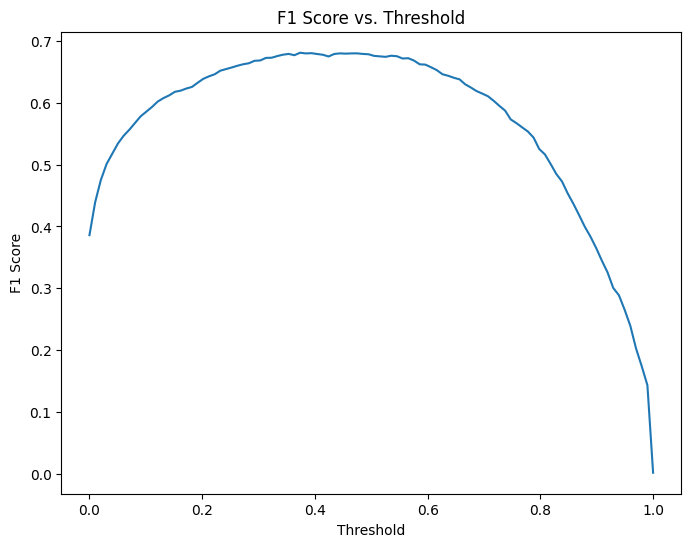

In [49]:
y_probs = lr_undersampled.predict_proba(X_test)[:,1]
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_probs >= thr)) for thr in thresholds]
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel( 'Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold') 
plt.show()

In [50]:
pd.DataFrame({'f1': f1_scores, 'thresholds': thresholds}).sort_values(by = 'f1', ascending=False)
# So, we say good threshold value is 0.37

,f1,thresholds
37,0.681228,0.373737
39,0.680500,0.393939
47,0.680213,0.474747
44,0.680182,0.444444
46,0.680112,0.464646
...,...,...
95,0.239130,0.959596
96,0.202576,0.969697
97,0.173810,0.979798
98,0.142944,0.989899


# So, we say good threshold value is 0.37

In [51]:
y_pred_opt= lr_undersampled.predict_proba(X_test)[:,1]>= 0.37
print(" Confusion Matrix: \n",confusion_matrix(y_test, y_pred_opt))
print(" Accuracy Score: ",accuracy_score(y_test, y_pred_opt))
print(" Precision Score: ",precision_score(y_test, y_pred_opt))
print(" Recall Score: ",recall_score(y_test, y_pred_opt))
print(" F-1 Score: ",f1_score(y_test, y_pred_opt))

 Confusion Matrix: 
 [[3996  871]
 [ 293 1236]]
 Accuracy Score:  0.8180112570356473
 Precision Score:  0.5866160417655434
 Recall Score:  0.8083714846304775
 F-1 Score:  0.6798679867986799


## Assignment 2: Class Weights

1. Fit a regression with standard, balanced and 4:1 (minority vs majority) class weights. Calculate the AUC for each.
2. For the weighting that had the best AUC, tune the threshold to maximize F1 score.


Test f1: 0.6508450197770587
 Confusion Matrix: 
 [[4520  347]
 [ 624  905]]
AUC: 0.7602968188611037


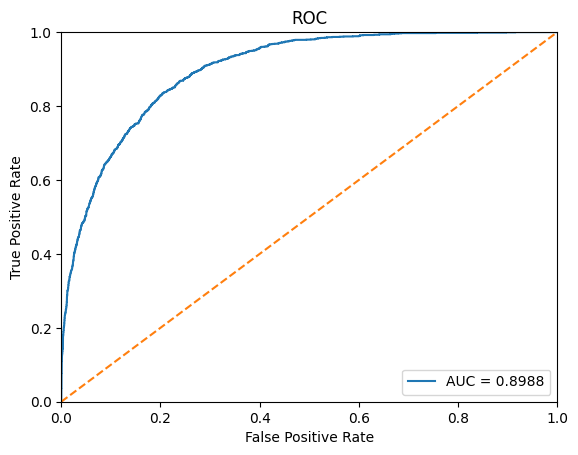

In [52]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
lr_default = LogisticRegression(max_iter = 5000)
lr_default.fit(X_train, y_train)
y_pred_default = lr_default.predict(X_test)
print(f"Test f1: {f1_score(y_test, y_pred_default)}")
#claculate the tpr and fpr for all thresholds of the classification
print(" Confusion Matrix: \n",confusion_matrix(y_test, y_pred_default))
print("AUC:", roc_auc_score(y_test, y_pred_default))
probs = lr_default.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold1= roc_curve(y_test, probs)
roc_auc1 = auc(fpr1, tpr1)
plt.title("ROC")
plt.plot(fpr1, tpr1, label="AUC = %0.4f" % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], '--', label="Random Guess")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Test f1: 0.6753453772582358
 Confusion Matrix: 
 [[3903  964]
 [ 258 1271]]
AUC: 0.8165968187401625


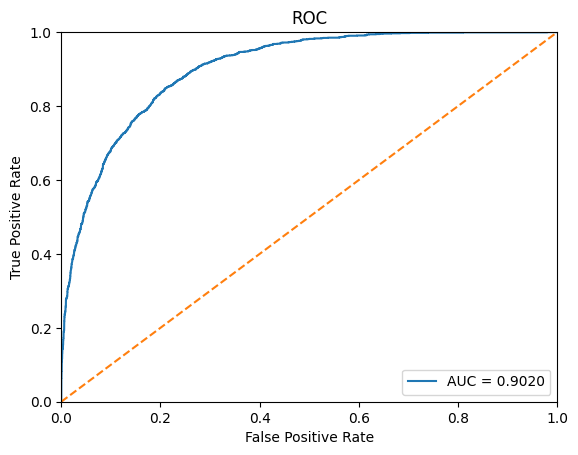

In [53]:
lr_balanced = LogisticRegression(max_iter = 5000, class_weight='balanced')
lr_balanced.fit(X_train, y_train)
print(f"Test f1: {f1_score(y_test, lr_balanced.predict(X_test))}")
y_pred_balanced = lr_balanced.predict(X_test)
#claculate the tpr and fpr for all thresholds of the classification
print(" Confusion Matrix: \n",confusion_matrix(y_test, y_pred_balanced))
print("AUC:", roc_auc_score(y_test, y_pred_balanced))
probs = lr_balanced.predict_proba(X_test)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, probs)
roc_auc2 = auc(fpr2, tpr2)
plt.title("ROC")
plt.plot(fpr2, tpr2, label="AUC = %0.4f" % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], '--', label="Random Guess")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Test f1: 0.6618705035971222
 Confusion Matrix: 
 [[3699 1168]
 [ 195 1334]]
AUC: 0.8162410505314485


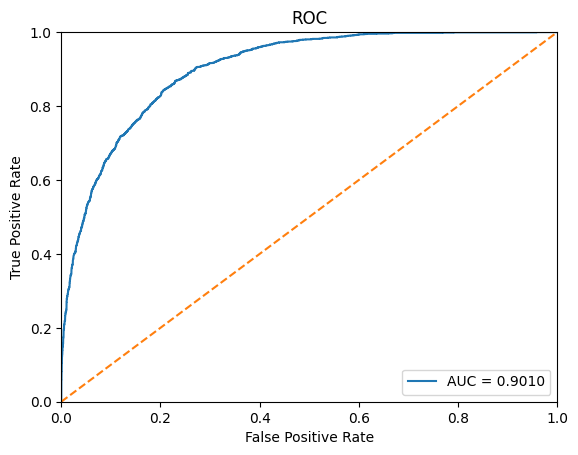

In [54]:
lr = LogisticRegression(max_iter = 5000, class_weight={1: 4, 0: 1})
lr.fit(X_train, y_train)
print(f"Test f1: {f1_score(y_test, lr.predict(X_test))}")
y_pred_weighted = lr.predict(X_test)
print(" Confusion Matrix: \n",confusion_matrix(y_test, y_pred_weighted))
print("AUC:", roc_auc_score(y_test, y_pred_weighted))
#claculate the tpr and fpr for all thresholds of the classification
probs = lr.predict_proba(X_test)[:,1]
fpr3, tpr3, threshold3 = roc_curve(y_test, probs)
roc_auc3 = auc(fpr3, tpr3)
plt.title("ROC")
plt.plot(fpr3, tpr3, label="AUC = %0.4f" % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], '--', label="Random Guess")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### From the AUC from above 3 plots, we can observe that balanced class weight has highest AUC(AUC: 0.8165968187401625). So we can perform tuning on that.

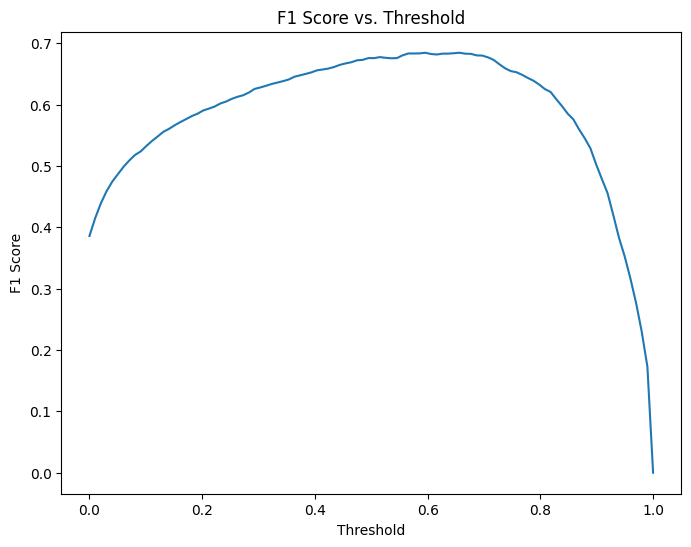

In [55]:

y_probs = lr_balanced.predict_proba(X_test)[:,1]
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_probs >= thr)) for thr in thresholds]
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel( 'Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold') 
plt.show()


In [56]:
pd.DataFrame({'f1': f1_scores, 'thresholds': thresholds}).sort_values(by = 'f1', ascending=False)
# So, we say good threshold value is 0.65

,f1,thresholds
65,0.684564,0.656566
59,0.684508,0.595960
64,0.683696,0.646465
58,0.683485,0.585859
57,0.683324,0.575758
...,...,...
95,0.317100,0.959596
96,0.277129,0.969697
97,0.230150,0.979798
98,0.172722,0.989899


# So, we say good threshold value is 0.65